# Plots de distribuições

Vamos discutir alguns gráficos que nos permitem visualizar a distribuição de um conjunto de dados. Esses plots são:

* distplot
* jointplot
* pairplot
* rugplot
* kdeplot

___
## Imports

In [1]:
import seaborn as sns
%matplotlib inline

## Dados
Seaborn vem com conjuntos de dados embutidos.

In [2]:
tips = sns.load_dataset('tips')

In [5]:
tips.head()



,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## distplot

O distplot mostra a distribuição de um conjunto de observações de uma variável.

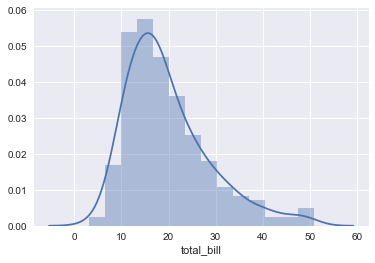

In [5]:
sns.distplot(tips['total_bill'])

Para remover a camada kde e apenas usar o histograma:

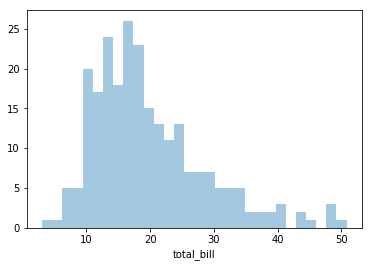

In [7]:
sns.distplot(tips['total_bill'],kde=False,bins=30)

## jointplot

jointplot() permite combinar basicamente dois distplots() para dados bivariados. Podemos visualizar os dados das seguintes formas (usando o **kind**):
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

d:\Users\lglmo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


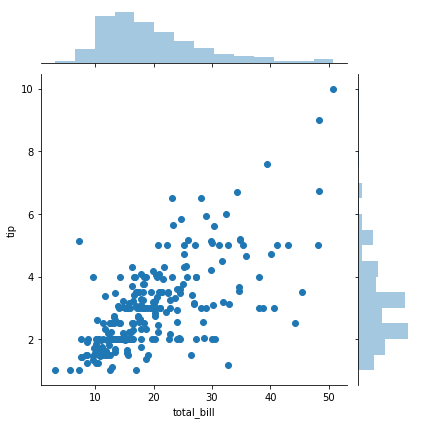

In [9]:
sns.jointplot(x='total_bill',y='tip',data=tips)

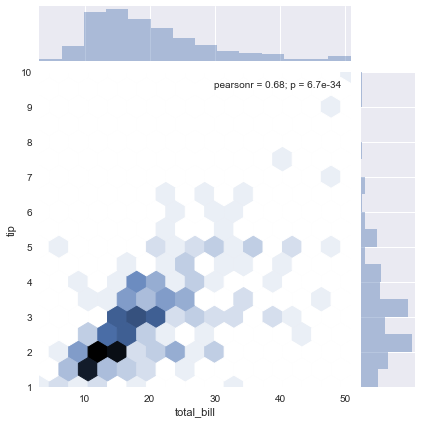

In [8]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


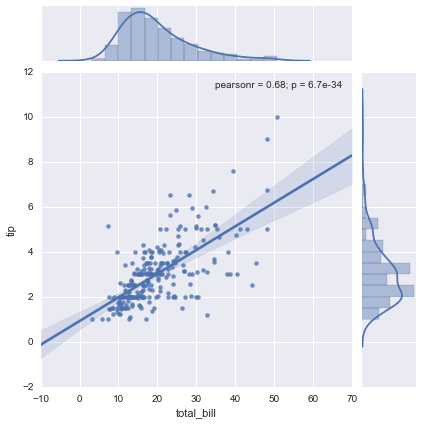

In [17]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

## pairplot

pairplot irá traçar distribuições entre pares em todo o DataFrame (para as colunas numéricas) e suporta um argumento de matiz de cor (para colunas categóricas).

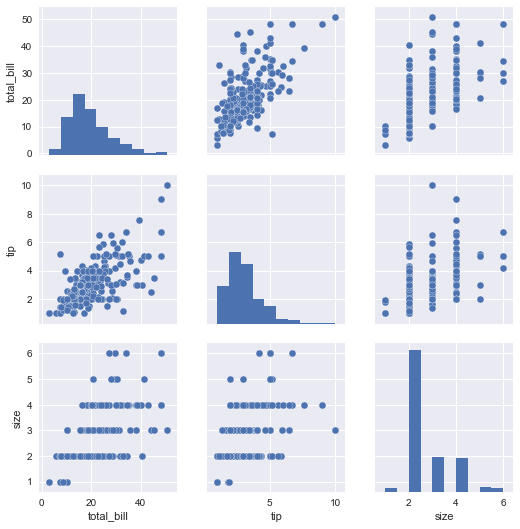

In [9]:
sns.pairplot(tips)

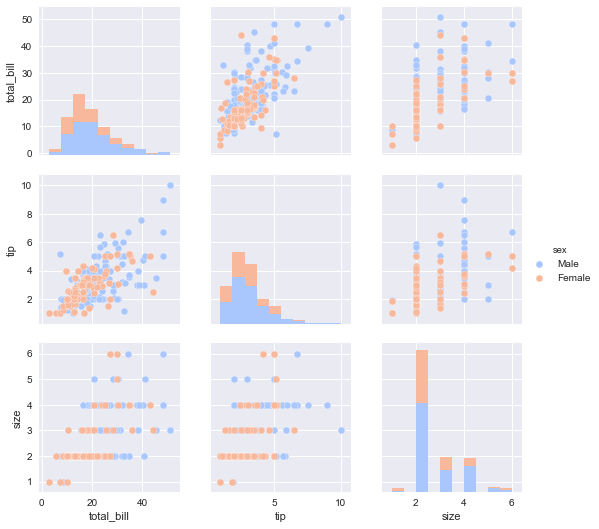

In [10]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

## rugplot

rugplots possuem um conceito muito simples, eles apenas desenham uma marca de traço para cada ponto em uma distribuição univariada. Eles são o bloco de construção de um KDE:

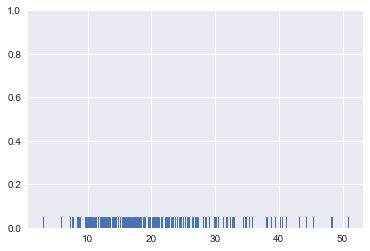

In [11]:
sns.rugplot(tips['total_bill'])

## kdeplot

kdeplots são [Plots de estimativa de densidade kernel](http://en.wikipedia.org/wiki/Kernel_density_estimation#Pratical_estimation_of_the_bandwidth). Esses plots KDE substituem cada observação com uma distribuição Gaussiana (Normal) centrada em torno desse valor. Por exemplo:

(0, 1)

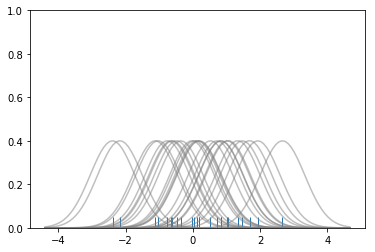

In [10]:
# Não se preocupe em entender este código!
# É apenas para o diagrama abaixo
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Cria o dataset
dataset = np.random.randn(25)

# Cria outro rugplot
sns.rugplot(dataset);

# Configure o eixo dos x para o gráfico
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 pontos igualmente espaçados de x_min para x_max
x_axis = np.linspace(x_min,x_max,100)

# Configure a largura de banda. Para obter informações sobre isso:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2

# Crie uma lista de kernel vazia
kernel_list = []

# Traça cada função de base
for data_point in dataset:
    
    # Crie um kernel para cada ponto e acrescente à lista
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    # Ajusta a escala para plotar
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

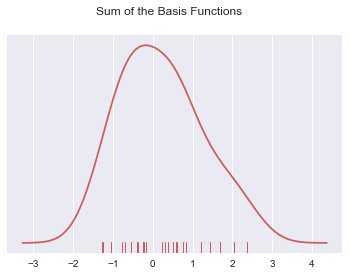

In [13]:
# Para obter o gráfico do kde podemos somar essas funções de base.

# Traça a soma da função de base
sum_of_kde = np.sum(kernel_list,axis=0)

# Plota a figura
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Adiciona o rugplot inicial
sns.rugplot(dataset,c = 'indianred')

# Livrar-se das marcas de "y-tick"
plt.yticks([])

# Define o título
plt.suptitle("Sum of the Basis Functions")

Então, com nosso DataFrame tips:

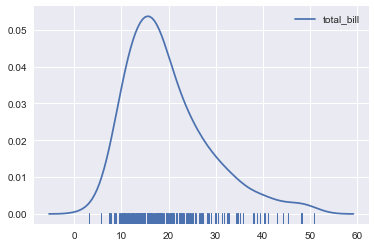

In [14]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

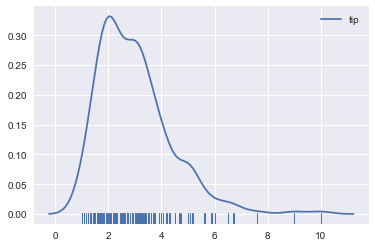

In [15]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])